# In Hospital Mortality Prediction using ML and PyCaret

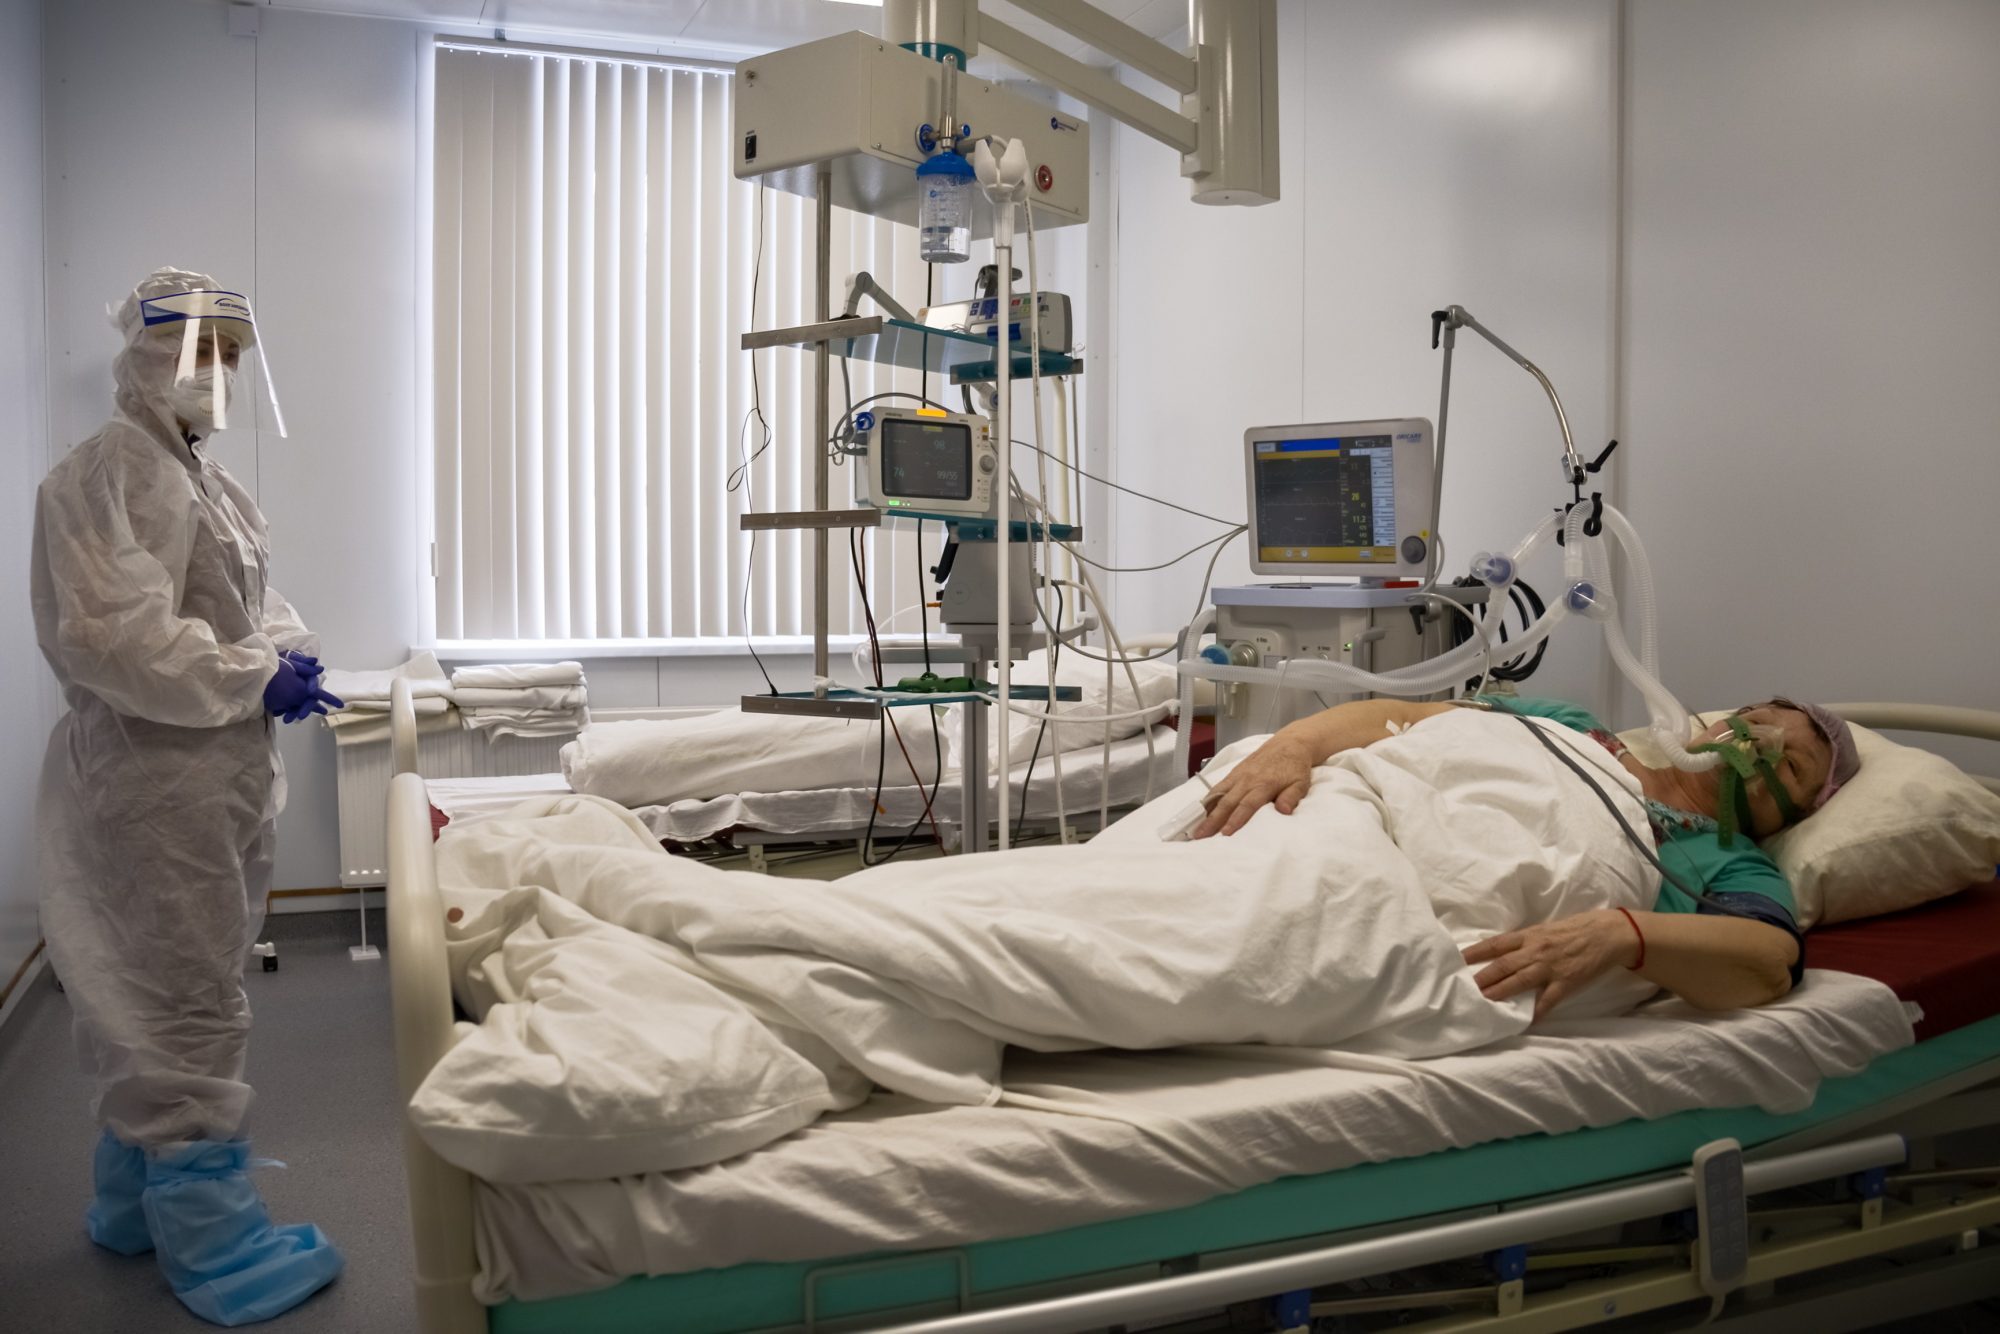

## Context :
### The predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized. We aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.

## Time Line of the Project:

- Data Analysis
- Data Preprocessing
- Model Building and Prediction using ML models

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("/content/mortality.csv")

In [3]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


## Data Analysis

In [4]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

In [5]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [6]:
df.shape

(1177, 51)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

### Handling NAN Values

#### 1) For float variables

In [8]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
float_col = df.select_dtypes(include='float64').columns

In [10]:
si.fit(df[float_col])

SimpleImputer()

In [11]:
df[float_col] = si.transform(df[float_col])

In [12]:
x = df.drop(columns='outcome')

y = df[['outcome']]

#### 2) For Dependent variable

In [13]:
SI =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [14]:
SI.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')

In [16]:
df_final = x.copy()

df_final['outcome'] = y

In [17]:
df_final.isnull().sum()

group                       0
ID                          0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR       

### Visualising our Dependent variable

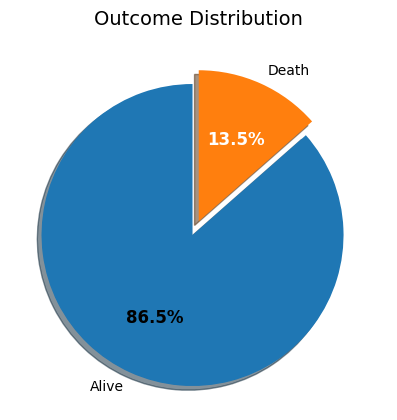

In [18]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

In [19]:
import plotly.express as px
fig = px.histogram(df, x="age", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [20]:
fig = px.histogram(df, x="BMI", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [21]:
fig = px.histogram(df, x="SP O2", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [22]:
fig = px.histogram(df, x="heart rate", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [23]:
df_final['gendera'].value_counts()

2    618
1    559
Name: gendera, dtype: int64

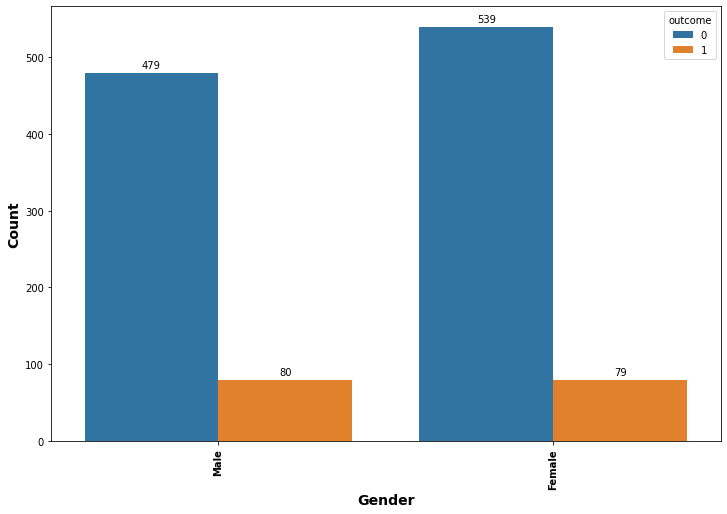

In [24]:
plt.figure(figsize=(12,8))
plot = sns.countplot(df_final['gendera'], hue=df_final['outcome'])
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical', weight='bold')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points') 

plt.show()

### Correlation

In [25]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [26]:
corr = df_final[col].corr()

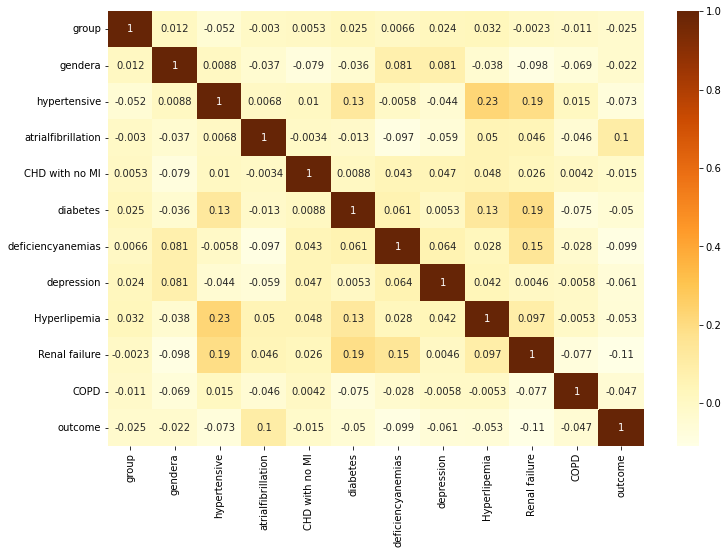

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

#### Distribution of Continuous var

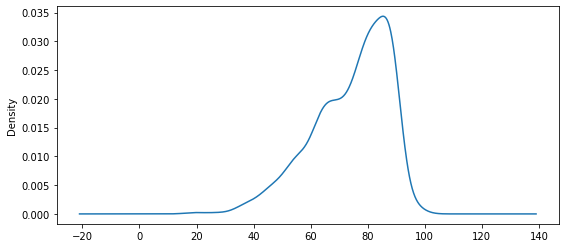

In [28]:
plt.figure(figsize=(9,4))
df_final['age'].plot(kind='kde')

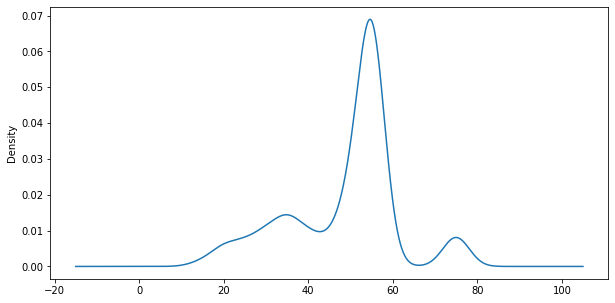

In [29]:
plt.figure(figsize=(10,5))
df_final['EF'].plot(kind='kde')

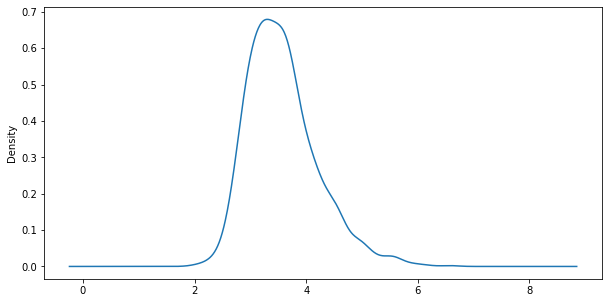

In [30]:
plt.figure(figsize=(10,5))
df_final['RBC'].plot(kind='kde')

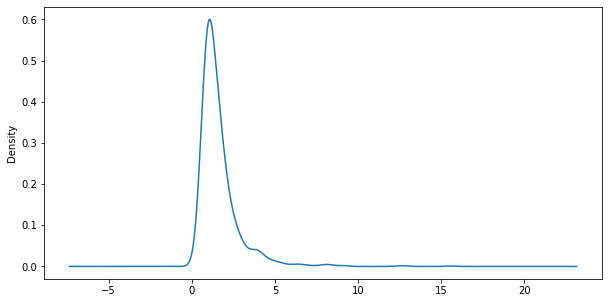

In [31]:
plt.figure(figsize=(10,5))
df_final['Creatinine'].plot(kind='kde')

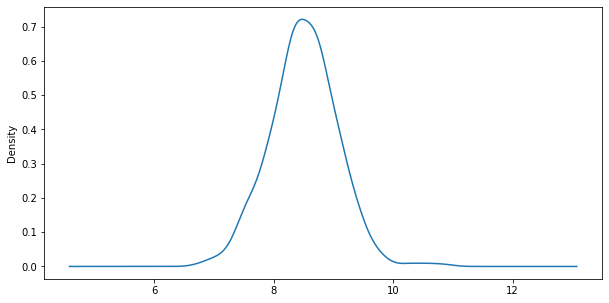

In [32]:
plt.figure(figsize=(10,5))
df_final['Blood calcium'].plot(kind='kde')

In [33]:
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,1,139812,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.113544,0.405569,12.233024,17.481057,1.625465,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,1,109787,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,1,130587,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,1,138290,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.113544,0.405569,12.233024,17.481057,1.625465,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,0


## Data Preprocessing

### Splitting our data

In [34]:
x = df_final.drop(columns='outcome')
y = df_final[['outcome']]

### Standardizing our data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale= StandardScaler()

In [37]:
scaled= scale.fit_transform(x)

In [38]:
final_x= pd.DataFrame(scaled,columns= x.columns)

In [39]:
final_x.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.653197,-0.886597,-0.153051,-1.051449,8.781267e-01,-1.595362,-0.906632,-0.306376,1.171744,1.396379,-0.36743,1.277932,1.318032,-0.286010,-0.988373,2.196509,0.829513,-1.050459,0.061423,0.928881,0.204219,-1.084885,-0.981552,-0.492730,-0.959065,-0.000584,0.125718,-0.585966,0.562432,-5.240843e-01,-0.013569,0.132057,-0.939933,-0.756705,-0.689194,-0.071794,0.246647,0.627297,-0.668798,1.543483,-0.033742,-1.814098,1.289532,-0.286026,1.980755,-2.545867,-1.112245,-1.533672,-0.503052,0.488583
1,-0.653197,-0.377851,0.070357,0.951068,8.431822e-16,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,-0.758707,3.496387,1.054724,1.276261,0.515262,0.012651,0.008722,0.284629,-0.378753,-0.218084,-0.697465,0.580632,-0.859187,1.270501,-0.794152,0.387791,0.043297,-1.363160e-15,0.000000,0.000000,0.000000,0.000000,-0.656629,-0.135318,-0.407021,-0.730927,-0.025384,0.659224,-0.000272,-0.591830,-0.719329,-0.935527,-0.925400,-2.631567,1.264720,-1.533672,2.950362,0.488583
2,-0.653197,-1.412399,0.666111,0.951068,-4.290589e-01,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,1.318032,-0.286010,-0.769802,1.005600,0.173514,0.713348,-0.371168,-0.429557,0.419838,-0.810404,-1.524190,1.825886,-1.116016,3.046958,3.692558,-1.001103,-0.329915,-1.152386e+00,0.351887,1.518254,-0.847730,-0.817196,-0.527512,-0.167734,0.178705,-0.111769,0.003984,3.975195,0.439627,-0.409649,0.669477,-1.480271,0.147056,-1.894540,0.708507,-1.533672,2.359646,-1.066269
3,-0.653197,-0.695710,-2.312661,0.951068,6.298430e+00,-1.595362,-0.906632,-0.306376,-0.853429,-0.716138,-0.36743,-0.782514,-0.758707,-0.286010,0.623253,0.487478,1.288319,0.265293,-0.647851,-1.062362,5.478914,0.908382,1.121170,-1.328311,-1.749173,-0.655269,0.509388,-0.475964,-0.222241,1.617714e-01,-0.622663,0.280578,1.309368,1.259674,-0.787192,-0.117584,-0.826461,-0.962021,-0.402266,0.506488,-0.093989,1.707012,-1.913344,-0.591321,-0.705227,-0.146241,2.257299,-1.420354,2.677724,0.488583
4,-0.653197,-0.430293,0.070357,0.951068,1.942067e-01,0.626817,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,1.318032,3.496387,-1.046015,2.236721,-0.133352,0.140355,0.140475,1.316424,2.040978,-0.380908,-0.460194,0.430387,0.572402,0.167873,0.147619,-0.359585,0.083979,-1.363160e-15,0.000000,0.000000,0.000000,0.000000,1.505573,-0.098202,0.240132,0.306817,-0.059646,1.463096,-0.535801,0.406521,0.415209,0.468234,-1.870013,-2.203063,-0.950913,-1.420354,0.405741,0.488583


In [40]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [42]:
print(x_train.shape, x_test.shape)

(823, 50) (354, 50)


In [43]:
x_train.drop(columns = 'ID', inplace=True)
x_test.drop(columns='ID', inplace=True)

In [44]:
x_train.head()

,group,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1011,2,83,2,21.127530,1,0,0,0,0,0,0,0,0,97.023256,100.000000,49.634146,22.767442,36.569444,92.833333,403.0,30.154545,2.870000,31.642857,31.000000,102.285714,17.414286,15.371429,442.571429,91.660000,0.100000,4.280000,15.566667,1.450000,3816.0,105.333333,1.000000,18.222222,189.333333,3.811111,135.666667,7.237500,105.888889,14.111111,1.837500,7.261667,19.666667,2.025000,44.000000,55
431,1,50,1,38.810503,0,0,0,1,0,0,0,0,1,91.020000,98.613636,60.386364,18.244444,36.377778,94.025000,708.0,37.975000,4.651250,26.725000,32.700000,81.875000,17.900000,7.500000,420.875000,81.100000,0.500000,12.833333,12.800000,1.083333,100.5,26.500000,0.654545,17.545455,153.500000,4.241667,141.500000,8.750000,104.000000,11.636364,2.030000,7.325556,30.363636,1.875000,55.333333,40
102,1,72,2,36.088782,1,1,0,1,1,0,1,1,0,72.052632,142.928571,63.500000,17.842105,35.925397,97.611111,2595.0,25.912500,2.811250,29.425000,31.912500,92.375000,19.225000,9.450000,243.875000,76.820000,0.280000,13.240000,19.257143,1.757143,4941.0,93.000000,2.155556,41.555556,145.375000,4.000000,143.444444,8.862500,109.444444,14.333333,1.862500,7.405000,23.666667,1.050000,40.000000,55
308,1,68,1,32.296449,1,0,0,1,1,0,0,0,0,63.200000,109.760000,51.040000,17.916667,36.138889,97.960000,3400.0,30.415385,3.541250,27.187500,32.012500,85.125000,21.225000,6.075000,253.625000,68.633333,0.350000,18.600000,35.500000,3.666667,2990.0,22.000000,1.035714,16.357143,112.200000,3.800000,135.928571,8.163636,100.642857,11.857143,2.007692,7.400000,27.357143,1.533333,47.500000,55
548,1,91,2,30.188278,0,0,0,0,0,0,1,0,0,113.052632,100.723404,71.744681,23.146341,37.071429,93.277778,643.0,27.153846,2.731667,34.300000,34.608333,99.083333,15.975000,16.433333,154.416667,80.113544,0.405569,12.233024,14.460000,1.220000,23609.5,538.857143,1.300000,41.882353,180.125000,3.888235,142.470588,8.294118,109.117647,15.647059,2.394118,7.426667,21.647059,2.400000,32.928571,20


## Model Development using ML

### We will use the XG Boost Classifier model 

In [45]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [46]:
xgb = XGBClassifier(random_state=42)

In [47]:
xgb.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [48]:
pred = xgb.predict(x_test)

In [49]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
cf = confusion_matrix(y_test, pred)

In [52]:
cf

array([[295,   6],
       [ 40,  13]])

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       301
           1       0.68      0.25      0.36        53

    accuracy                           0.87       354
   macro avg       0.78      0.61      0.64       354
weighted avg       0.85      0.87      0.84       354



### Comparing Values

In [54]:
combine = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [55]:
combine_result = pd.DataFrame(combine,  columns=['y_test', 'y_pred'])

In [56]:
combine_result

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
349,1,1
350,0,0
351,0,0
352,0,0


#### Plotting ROC and Accuracy Curve

In [57]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

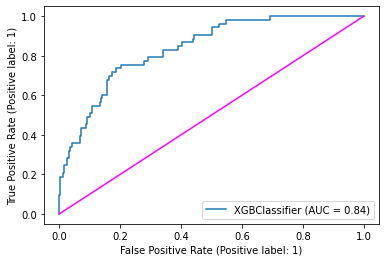

In [58]:
plot_roc_curve(xgb, x_test, y_test)
plt.plot([0,1], [0,1], color='magenta', ls='-')